# ATMS 391 Geophysical Data Analysis
## Final Exam
---

Instructions: Do your best to complete the exam by 11:00.  The exam will be collected at that time for grading.  Good luck, and have a good break!

Each problem is worth 20 points.  Each part of each problem is worth equal weight in the question total.

If you have a question, you can ask Jian or call/text Steve at 217-390-9086.

---

## Problem 1

The file max_t.csv, which is a comma separated values text file, contains daily monthly high temperatures for a month for Champaign and Peoria, Illinois.

(a) What is the mean and standard deviation of the data for each city?

In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('max_t.csv', header=0, 
        usecols=['Champaign Max T','Peoria Max T'])

champaign = data['Champaign Max T']
peoria = data['Peoria Max T']

print('Champaign mean: %g, Peoria mean: %g' %(np.mean(champaign), np.mean(peoria)))
print('Champaign std: %g, Peoria std: %g' %(np.std(champaign), np.std(peoria)))

Champaign mean: 82.2616, Peoria mean: 76.867
Champaign std: 7.28888, Peoria std: 6.06586


(b) What is the 5th and 95th percentile of the data for each city?

In [7]:
champaign_5th, champaign_95th = np.percentile(champaign, (5,95))
peoria_5th, peoria_95th = np.percentile(peoria, (5,95))

print('Champaign 5th: %g, Peoria 5th: %g' %(champaign_5th, peoria_5th))
print('Champaign 95th: %g, Peoria 95th: %g' %(champaign_95th, peoria_95th))

Champaign 5th: 73.0069, Peoria 5th: 66.7174
Champaign 95th: 92.4134, Peoria 95th: 84.8482


(c) Plot a histogram of the data for each city (on the same axes) with 40 bins.

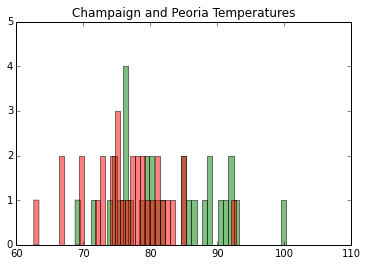

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(champaign, bins=40, alpha = 0.5, color = 'g')
plt.axis([60,110,0,5])
plt.hist(peoria, bins=40, alpha = 0.5, color = 'r')
plt.axis([60,110,0,5])
plt.title('Champaign and Peoria Temperatures')
plt.show()

(d) Plot a cumulative distribution function of the data for each city on the same axes, using the data in (c).

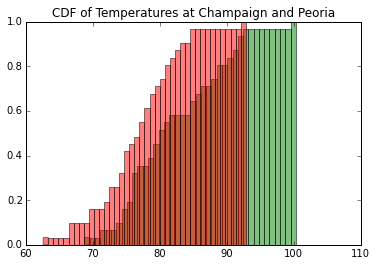

In [9]:
plt.hist(champaign, bins=40, alpha = 0.5, color = 'g', normed = True, cumulative = True)
plt.axis([60,110,0,1])
plt.hist(peoria, bins=40, alpha = 0.5, color = 'r', normed = True, cumulative = True)
plt.axis([60,110,0,1])
plt.title('CDF of Temperatures at Champaign and Peoria')
plt.show()

(e) Using a t-test, are the means of these two datasets significantly different at the 95% level?

In [11]:
import scipy.stats as st

statistc, pvalue = st.ttest_ind(champaign, peoria)
print("p value = %g" %pvalue)

# p value less than 0.05, so we reject the null hypothesis. So the means are siginifcantly different at 95% level.

p value = 0.00281262


---
## Problem 2

The file 20151213_0000_slp.nc is a netCDF file that contains mean sea level pressure (in Pascals, or Pa) from the NCEP Reanalysis for December 13, 2015 at 00:00 UTC.  The variable for mean sea level pressure is 'slp'.

(1) Plot a map of slp over the globe in hPa (1 hPa = 100 Pa, the units of the data are in Pa).  Be sure to include coastlines.

<matplotlib.colorbar.Colorbar instance at 0x7f02e1932908>

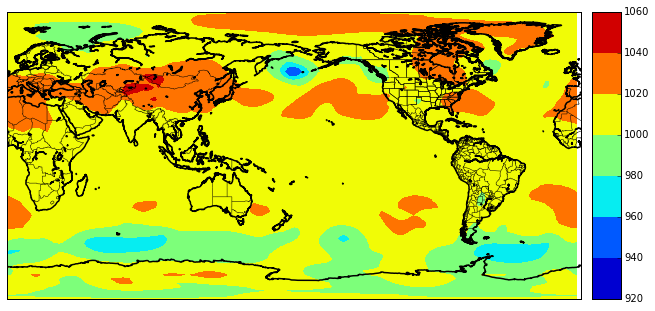

In [12]:
import xray
from mpl_toolkits.basemap import Basemap

data = xray.open_dataset('20151213_0000_slp.nc')

time_1d = data.variables['time']
lat_1d = data.variables['lat'].squeeze()
lon_1d = data.variables['lon'].squeeze()
lon_2d, lat_2d = np.meshgrid(lon_1d, lat_1d)
full_lat_1d = lat_2d.flatten()
full_lon_1d = lon_2d.flatten()

slp_2d = data['slp'][0,:,:].values.squeeze() / 100 # in hpa

fig=plt.figure(figsize=(11,8.5))  #width, height in inches
map = Basemap(llcrnrlon=0.,llcrnrlat=-90.,urcrnrlon=360.,urcrnrlat=90.,
             resolution='l', projection='cyl')
CS=map.contourf(lon_2d, lat_2d, slp_2d)
map.drawcoastlines(linewidth=1.5)
map.drawstates()
map.drawcountries()
map.colorbar()

(2) What are the 5th and 95th percentiles of the slp (in hPa) at this time?

In [13]:
slp_5, slp_95 = np.percentile(slp_2d, (5,95))
print(slp_5)
print(slp_95)

989.1
1025.7


(3) Using your answer in (2), identify the regions above and below these values in the image.  Plot these on a map (you can use separate maps).

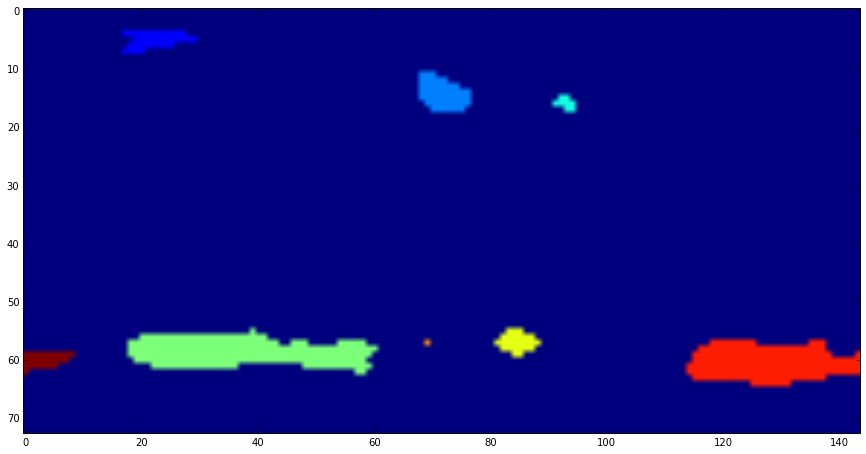

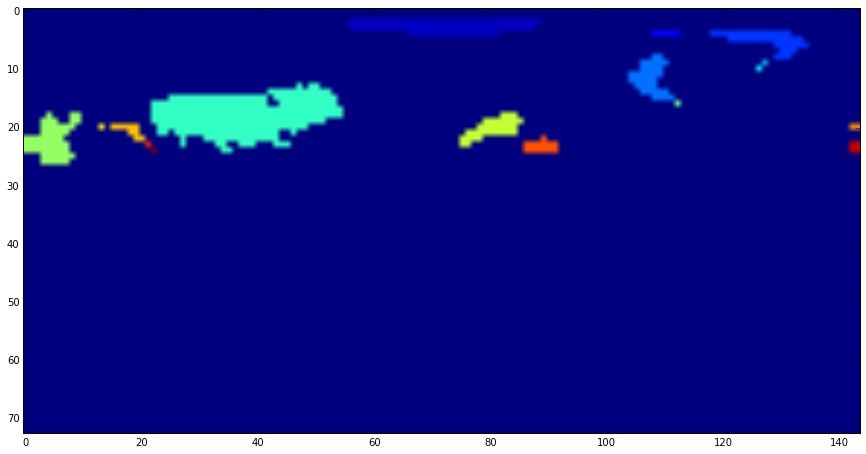

In [18]:
import scipy.ndimage

im=data['slp'].isel(time=0) / 100 # in hpa
#print(im)

masklow = im < slp_5
label_imlow,nb_labelslow = scipy.ndimage.label(masklow)
plt.figure(figsize=(15,11))
plt.imshow(label_imlow)
plt.show()

maskhigh = im > slp_95
label_imhigh,nb_labelshigh = scipy.ndimage.label(maskhigh)
plt.figure(figsize=(15,11))
plt.imshow(label_imhigh)
plt.show()

(4) Plot a histogram of the minimum slp values (in hPa) in the 5th percentile regions, and a histogram of the maximum slp values in the 95th percentile regions. You can use separate plots if you wish.

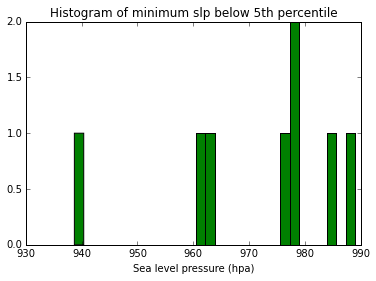

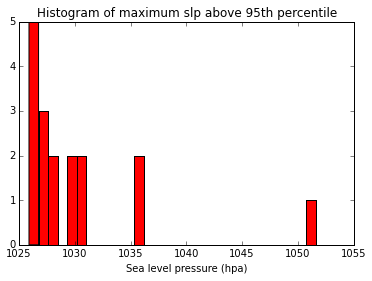

In [22]:
minslow = scipy.ndimage.minimum(im, label_imlow, range(1, nb_labelslow + 1))
maxshigh = scipy.ndimage.maximum(im, label_imhigh, range(1, nb_labelshigh + 1))

plt.hist(minslow, bins=30, color='g', label='Histogram')
plt.title('Histogram of minimum slp below 5th percentile')
plt.xlabel('Sea level pressure (hpa)')
plt.show()

plt.hist(maxshigh, bins=30, color='r', label='Histogram')
plt.title('Histogram of maximum slp above 95th percentile')
plt.xlabel('Sea level pressure (hpa)')
plt.show()